# Heart Disease Prediction ML Project

## Step 1: Import Libraries and Load Dataset

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv(r"/content/drive/MyDrive/heart.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Step 2: Exploratory Data Analysis (EDA)

In [7]:

print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak          

## Step 3: Visualization

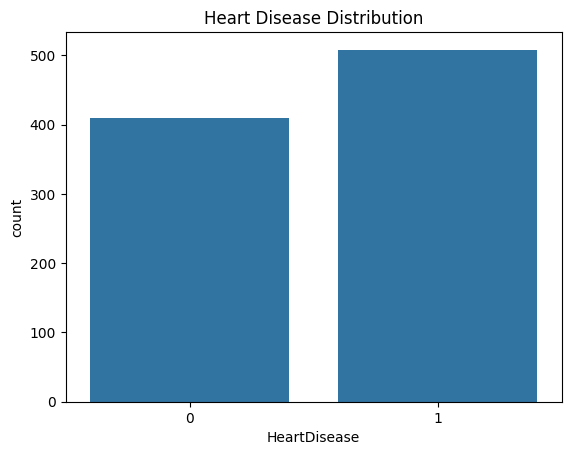

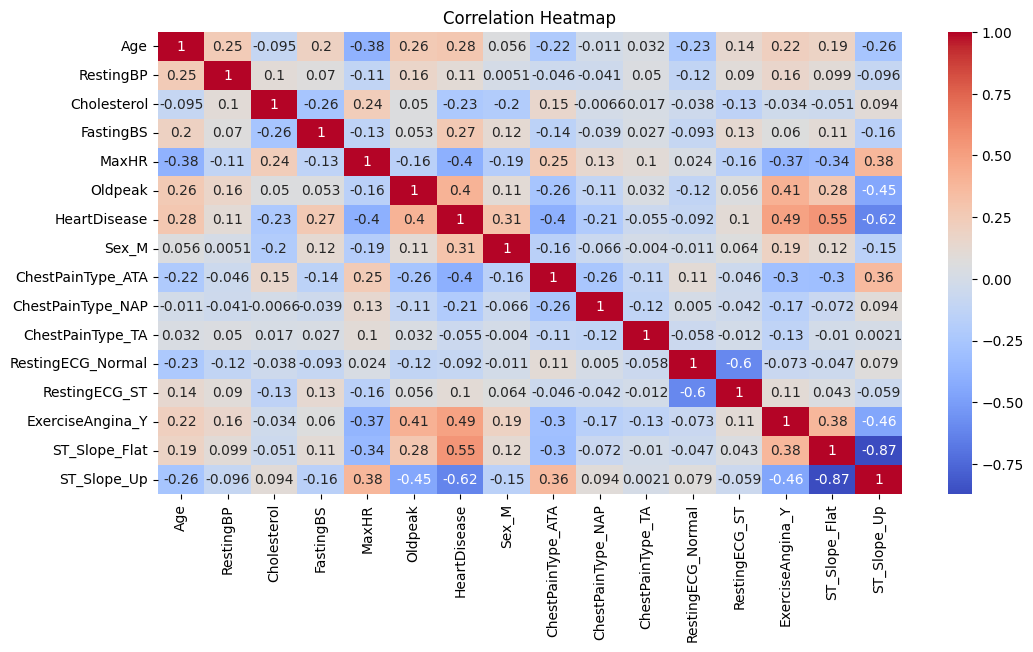

/tmp/ipython-input-42321926.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette="Set2")


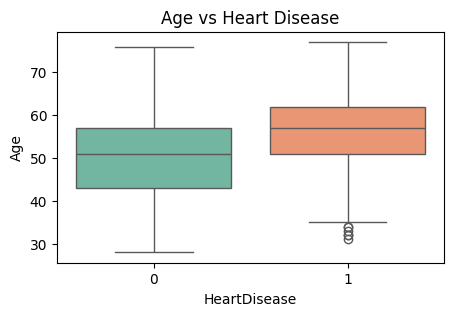

/tmp/ipython-input-42321926.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette="Set2")


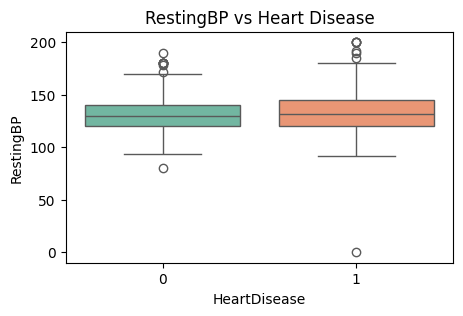

/tmp/ipython-input-42321926.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette="Set2")


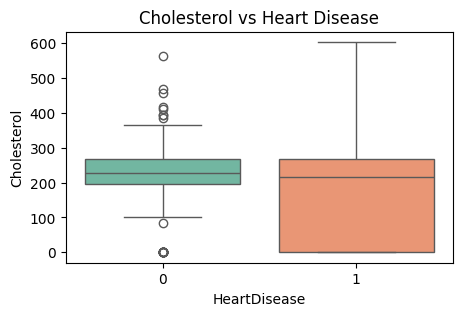

/tmp/ipython-input-42321926.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette="Set2")


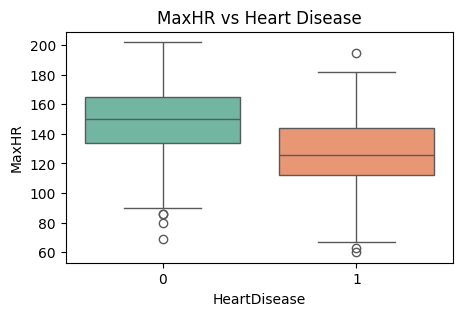

In [18]:
# 1) Countplot of target
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

# 2) Encode categorical columns before correlation
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 3) Boxplots
features = ['Age','RestingBP','Cholesterol','MaxHR']
for col in features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='HeartDisease', y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Heart Disease")
    plt.show()


## Step 4: Data Preprocessing

In [21]:
# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical columns to numbers
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train
X_test

array([[ 0.9852022 ,  0.37382802, -0.0618121 , ..., -0.84599688,
        -1.03853255,  1.17499908],
       [-0.08038358,  0.64381928,  2.94653936, ..., -0.84599688,
         0.96289712, -0.8510645 ],
       [ 1.19831935,  1.45379306, -1.87799952, ..., -0.84599688,
         0.96289712, -0.8510645 ],
       ...,
       [-0.08038358, -0.43614577, -1.87799952, ..., -0.84599688,
        -1.03853255,  1.17499908],
       [ 0.026175  , -1.24611955,  0.05926706, ..., -0.84599688,
        -1.03853255,  1.17499908],
       [-1.57220366,  0.26583151,  0.17103244, ..., -0.84599688,
         0.96289712, -0.8510645 ]])

## Step 5: Model Training

In [23]:

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

## Step 6: Model Evaluation

Accuracy: 0.8739130434782608
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        98
           1       0.89      0.89      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



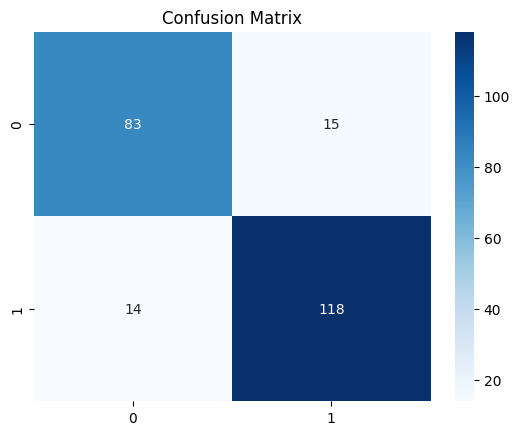

In [24]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
